In [1]:
import sys,os
sys.path.append(os.path.abspath('../'))
from modules import tomographic_doppler as tmd
%pylab notebook
import collections
from modules import auto_doppler_cov as adc
from modules import cross_doppler_cov as cdc

Populating the interactive namespace from numpy and matplotlib


In [57]:
fct1.flux_cutoff_options

[0.0, 1.0, 3.0, 5.0, 6.0, 7.2999999999999998, 10.0, 23.0, 40.0, 70.0, 100.0]

In [74]:
beta=1.23e-3
sky_area=30000.

fct1=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct1.init_camb(lmax=2048,limber_phi_lmin=300)
fct1.setup_obs_param(flux_cutoff=fct1.flux_cutoff_options[0],area_obs=sky_area)
fct1.setup_window_functions(normalize=False,nzbin=1,z_olap=-0.01,taper_width=0.05)
fct1.return_spectra()

fct2=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct2.init_camb(lmax=2048,limber_phi_lmin=300)
fct2.setup_obs_param(flux_cutoff=fct2.flux_cutoff_options[1],area_obs=sky_area)
fct2.setup_window_functions(normalize=False,nzbin=2,z_olap=-0.01,taper_width=0.05)
fct2.return_spectra()

fct3=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct3.init_camb(lmax=2048,limber_phi_lmin=300)
fct3.setup_obs_param(flux_cutoff=fct3.flux_cutoff_options[1],area_obs=sky_area)
fct3.setup_window_functions(normalize=False,nzbin=3,z_olap=-0.01,taper_width=0.05)
fct3.return_spectra()

fct4=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct4.init_camb(lmax=2048,limber_phi_lmin=300)
fct4.setup_obs_param(flux_cutoff=fct4.flux_cutoff_options[1],area_obs=sky_area)
fct4.setup_window_functions(normalize=False,nzbin=4,z_olap=-0.01,taper_width=0.05)
fct4.return_spectra()

# fct5=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
# fct5.init_camb(lmax=2048,limber_phi_lmin=300)
# fct5.setup_obs_param(flux_cutoff=fct5.flux_cutoff_options[1],area_obs=sky_area)
# fct5.setup_window_functions(normalize=False,nzbin=5,z_olap=-0.01,taper_width=0.05)
# fct5.return_spectra()

# fct6=tmd.ska_spectroscopic_doppler_forecast()
# fct6.init_camb(lmax=2048,limber_phi_lmin=300)
# fct6.setup_obs_param(flux_cutoff=fct6.flux_cutoff_options[1],area_obs=sky_area)
# fct6.setup_window_functions(normalize=False,nzbin=6,z_olap=-0.01,taper_width=0.05)
# fct6.return_spectra()

# fct8=tmd.ska_spectroscopic_doppler_forecast()
# fct8.init_camb(lmax=2048,limber_phi_lmin=300)
# fct8.setup_obs_param(flux_cutoff=fct8.flux_cutoff_options[1],area_obs=sky_area)
# fct8.setup_window_functions(normalize=False,nzbin=8,z_olap=-0.01,taper_width=0.05)
# fct8.return_spectra()

fct1.calc_doppler_error()
fct2.calc_doppler_error()
fct3.calc_doppler_error()
fct4.calc_doppler_error()
# fct5.calc_doppler_error()
# fct6.calc_doppler_error()
# fct8.calc_doppler_error()

In [79]:
print fct1.total_gal_num/1e9
print fct2.total_gal_num/1e9

4.27369140226
0.372644040061


<IPython.core.display.Javascript object>


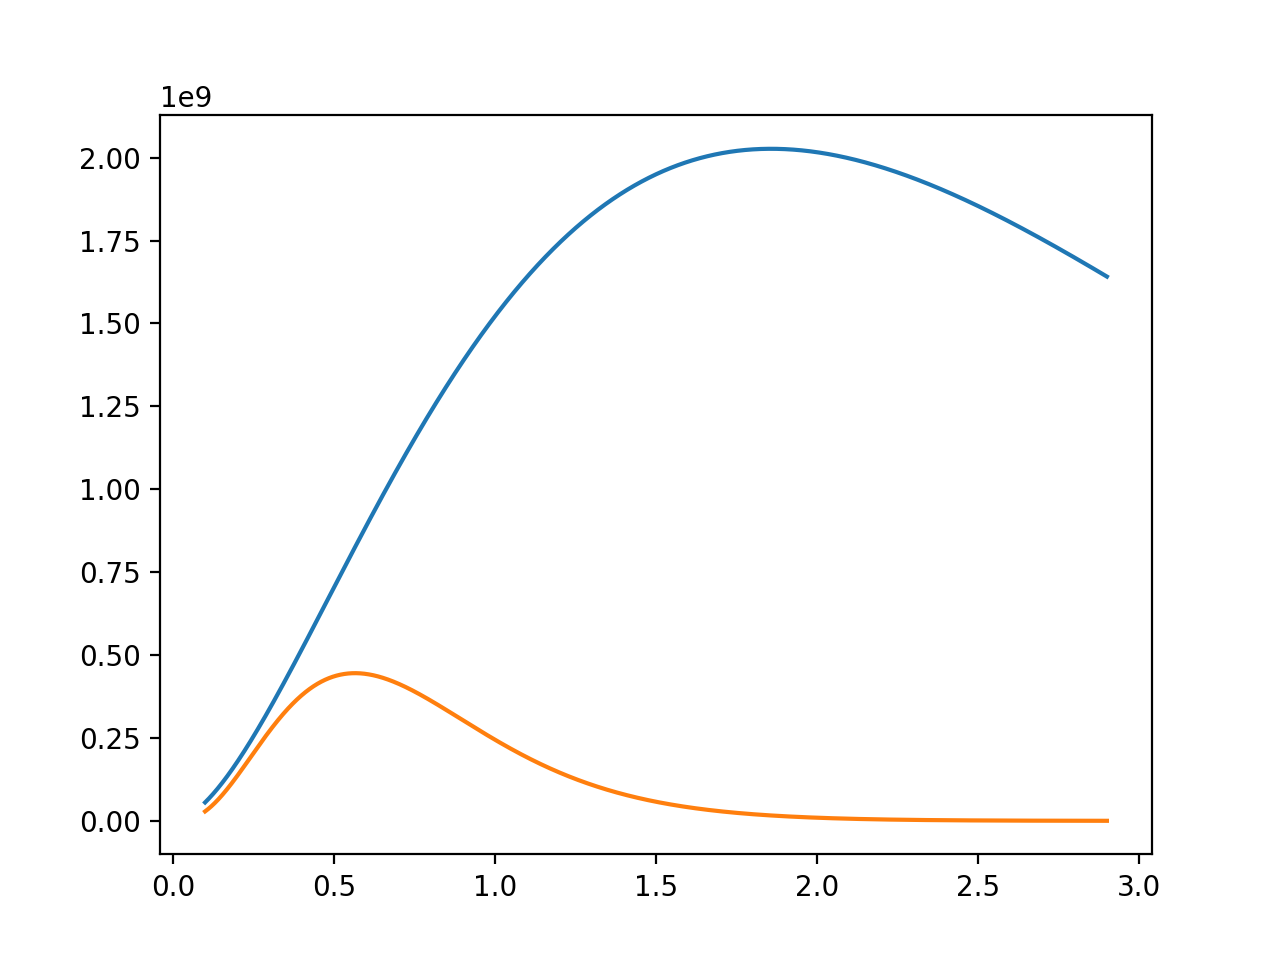

In [75]:
figure()
plot(fct1.z,fct1.dndz)
plot(fct2.z,fct2.dndz)

<IPython.core.display.Javascript object>


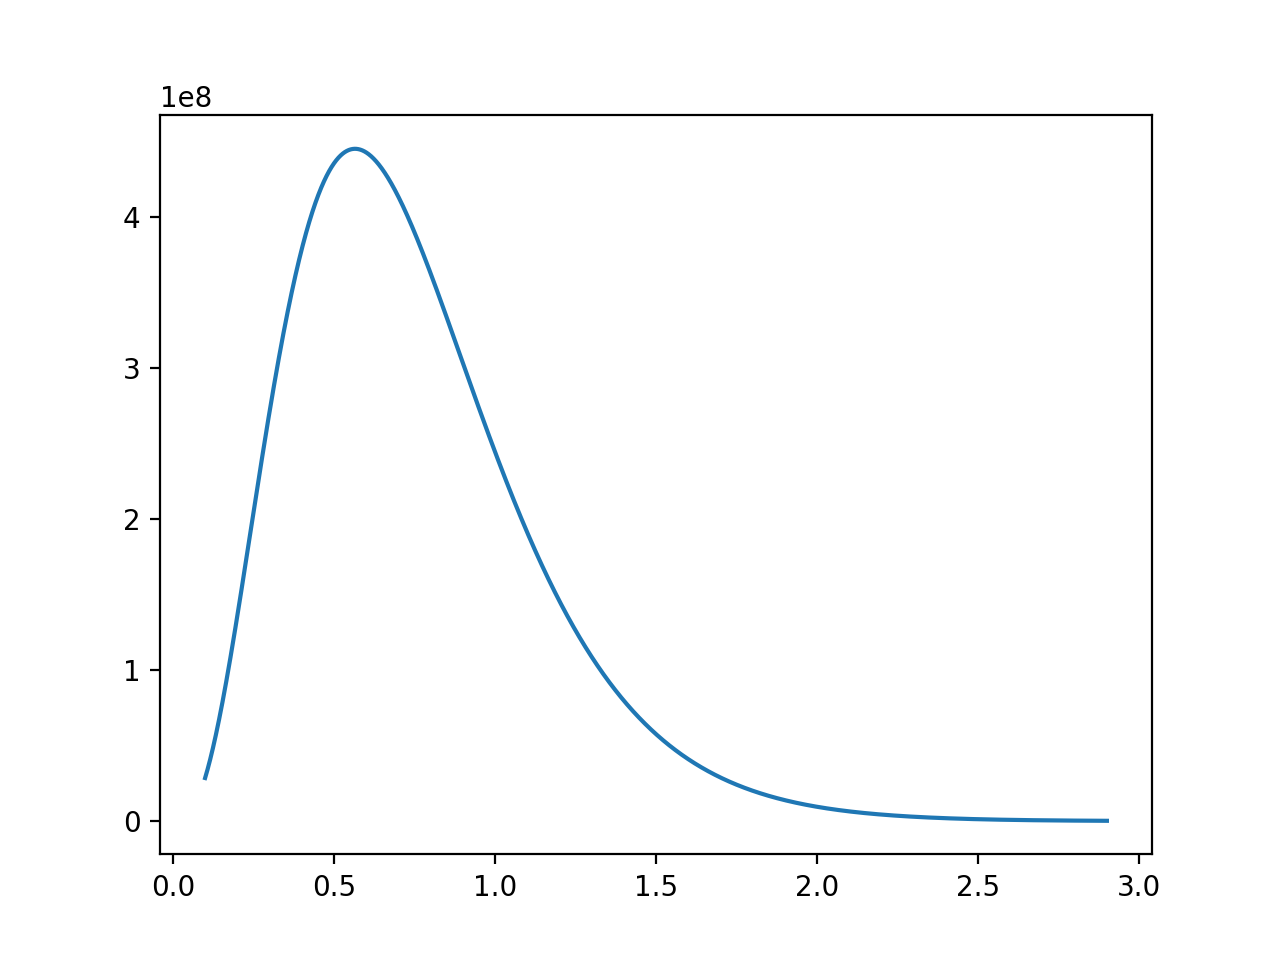

<IPython.core.display.Javascript object>


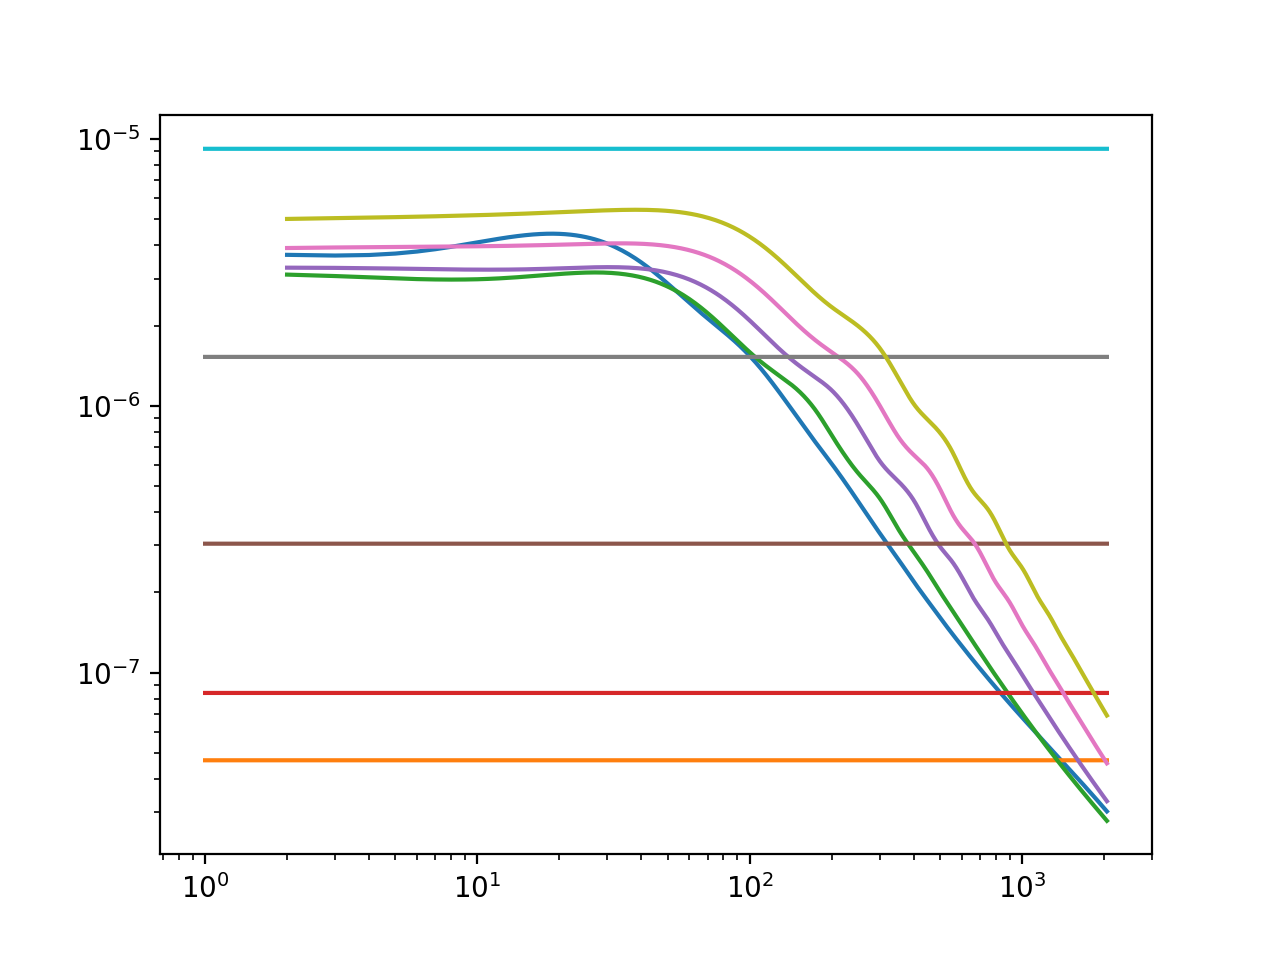

<IPython.core.display.Javascript object>


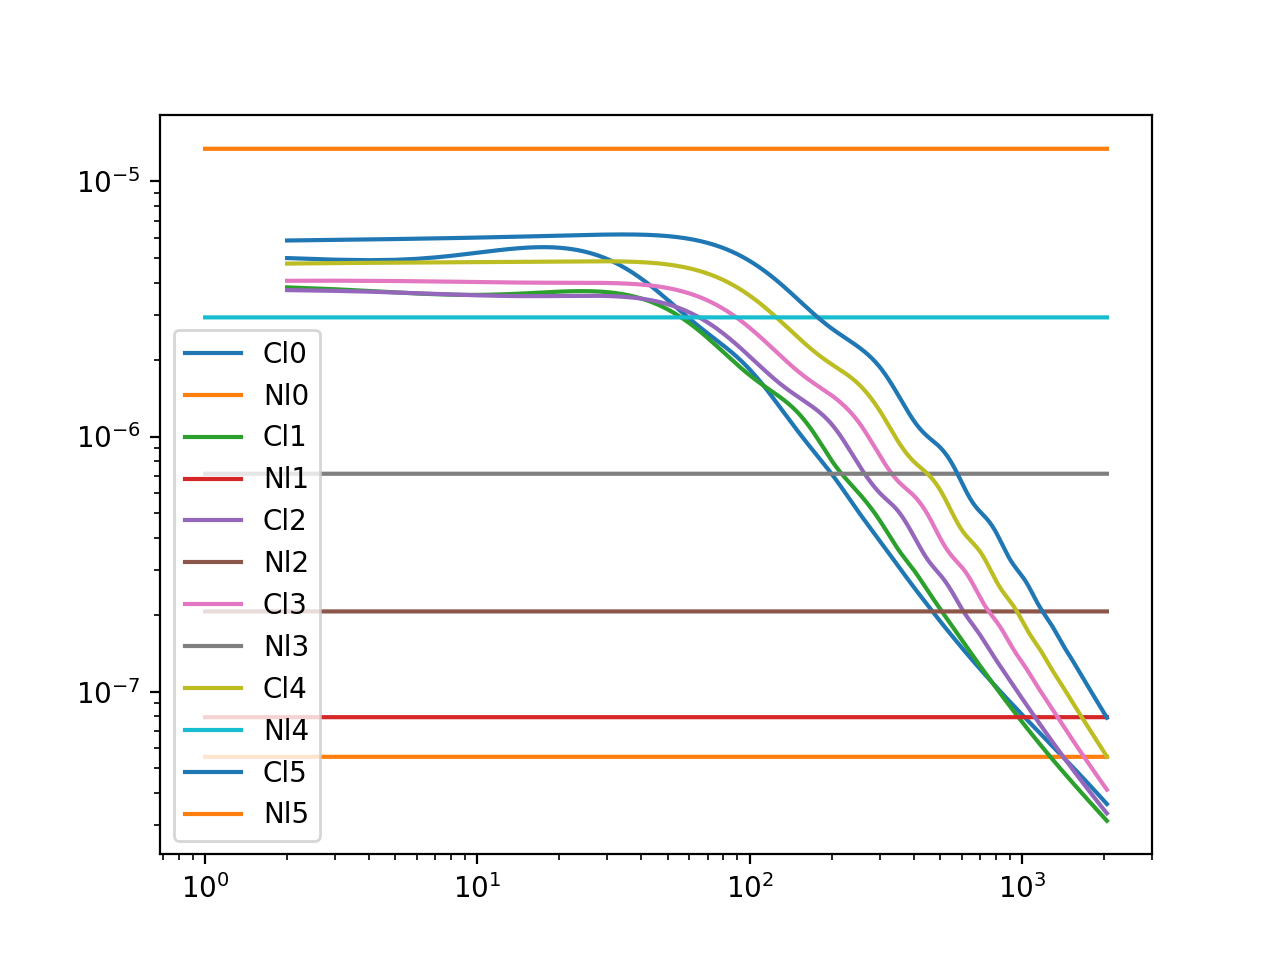

In [73]:
figure()
plot(fct1.z,fct1.dndz)

figure()
for adr in fct5.adr_auto.values():
    plot(fct5.ell,fct5.cls[adr])
    plot(fct5.ell,fct5.nl[adr])
loglog()

figure()
for idr,adr in enumerate(fct6.adr_auto.values()):
    plot(fct6.ell,fct6.cls[adr],label="Cl" + str(idr))
    plot(fct6.ell,fct6.nl[adr],label="Nl" + str(idr))
loglog()
legend(loc=0)

<IPython.core.display.Javascript object>


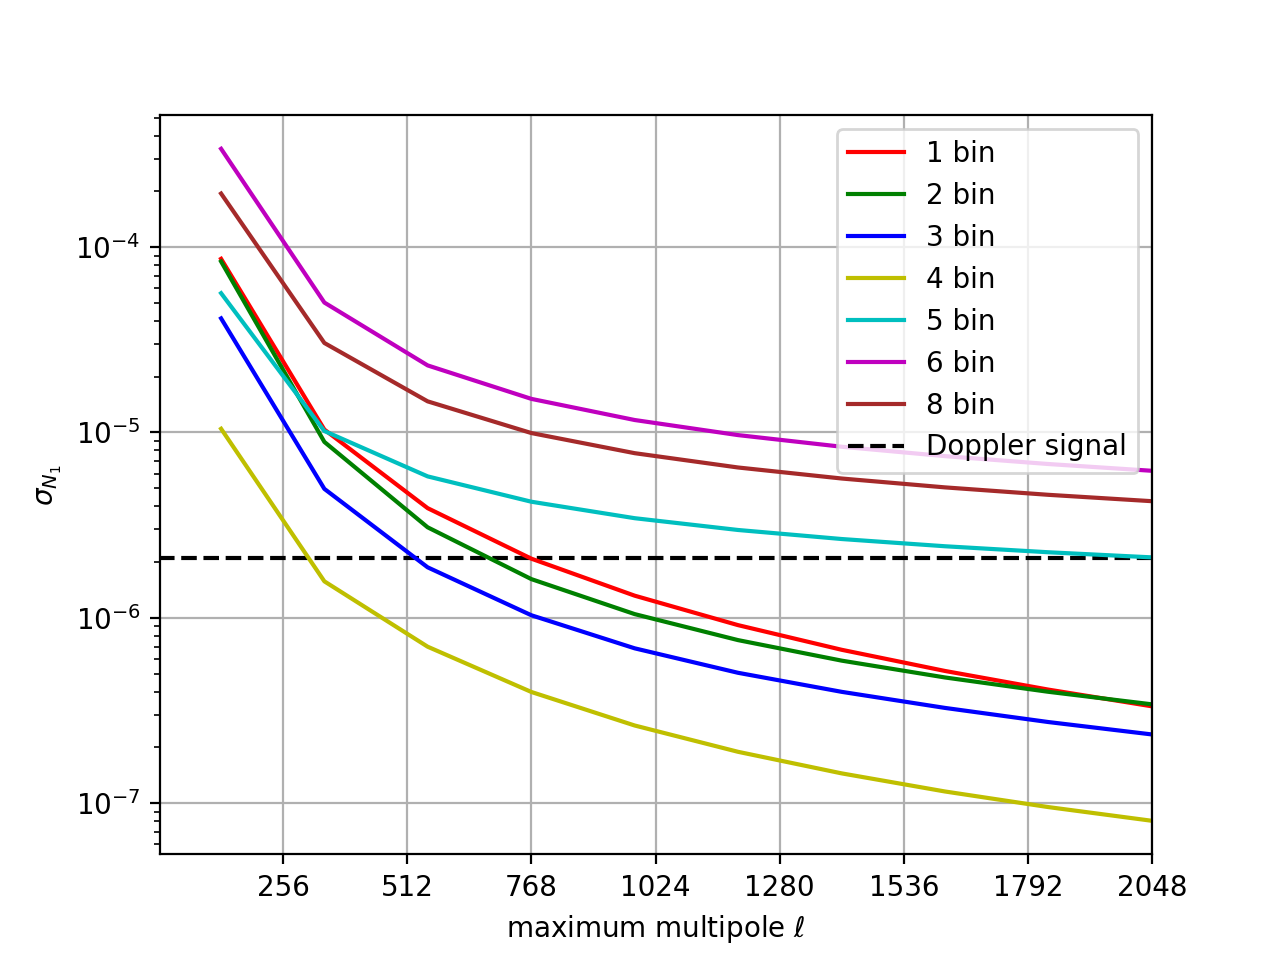

In [64]:
figure()
plot(fct1.ell_max,fct1.err,"r-",label="1 bin")
plot(fct2.ell_max,fct2.err,"g-",label="2 bin")
plot(fct3.ell_max,fct3.err,"b-",label="3 bin")
plot(fct4.ell_max,fct4.err,"y-",label="4 bin")
plot(fct5.ell_max,fct5.err,"c-",label="5 bin")
plot(fct6.ell_max,fct6.err,"m-",label="6 bin")
plot(fct8.ell_max,fct8.err,"-",c="brown",label="8 bin")
semilogy()
hlines(pi*(2.*beta/3.)**2.,0,max(fct1.ell_max),linestyle="dashed",label=r"Doppler signal")
semilogy() ; grid()
xlim(2,max(fct1.ell_max))
legend(loc=0)
xticks([256,512,768,1024,1280,1536,1792,2048],[256,512,768,1024,1280,1536,1792,2048])
xlabel("maximum multipole $\ell$")
ylabel(r"$\sigma_{N_1}$")

In [53]:
beta=1.23e-3
sky_area=15000.

fct1=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct1.init_camb(lmax=2048,limber_phi_lmin=300)
fct1.setup_obs_param(flux_cutoff=fct1.flux_cutoff_options[0],area_obs=sky_area)
fct1.setup_window_functions(normalize=False,nzbin=1,z_olap=-0.01,taper_width=0.05)
fct1.return_spectra()

fct2=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct2.init_camb(lmax=2048,limber_phi_lmin=300)
fct2.setup_obs_param(flux_cutoff=fct2.flux_cutoff_options[0],area_obs=sky_area)
fct2.setup_window_functions(normalize=False,nzbin=2,z_olap=-0.01,taper_width=0.05)
fct2.return_spectra()

fct3=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct3.init_camb(lmax=2048,limber_phi_lmin=300)
fct3.setup_obs_param(flux_cutoff=fct3.flux_cutoff_options[0],area_obs=sky_area)
fct3.setup_window_functions(normalize=False,nzbin=3,z_olap=-0.01,taper_width=0.05)
fct3.return_spectra()

fct4=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct4.init_camb(lmax=2048,limber_phi_lmin=300)
fct4.setup_obs_param(flux_cutoff=fct4.flux_cutoff_options[0],area_obs=sky_area)
fct4.setup_window_functions(normalize=False,nzbin=4,z_olap=-0.01,taper_width=0.05)
fct4.return_spectra()

fct5=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct5.init_camb(lmax=2048,limber_phi_lmin=300)
fct5.setup_obs_param(flux_cutoff=fct5.flux_cutoff_options[0],area_obs=sky_area)
fct5.setup_window_functions(normalize=False,nzbin=5,z_olap=-0.01,taper_width=0.05)
fct5.return_spectra()

fct6=tmd.ska_spectroscopic_doppler_forecast()
fct6.init_camb(lmax=2048,limber_phi_lmin=300)
fct6.setup_obs_param(flux_cutoff=fct6.flux_cutoff_options[0],area_obs=sky_area)
fct6.setup_window_functions(normalize=False,nzbin=6,z_olap=-0.01,taper_width=0.05)
fct6.return_spectra()

fct8=tmd.ska_spectroscopic_doppler_forecast()
fct8.init_camb(lmax=2048,limber_phi_lmin=300)
fct8.setup_obs_param(flux_cutoff=fct8.flux_cutoff_options[0],area_obs=sky_area)
fct8.setup_window_functions(normalize=False,nzbin=8,z_olap=-0.01,taper_width=0.05)
fct8.return_spectra()

fct1.calc_doppler_error()
fct2.calc_doppler_error()
fct3.calc_doppler_error()
fct4.calc_doppler_error()
fct5.calc_doppler_error()
fct6.calc_doppler_error()
fct8.calc_doppler_error()

<IPython.core.display.Javascript object>


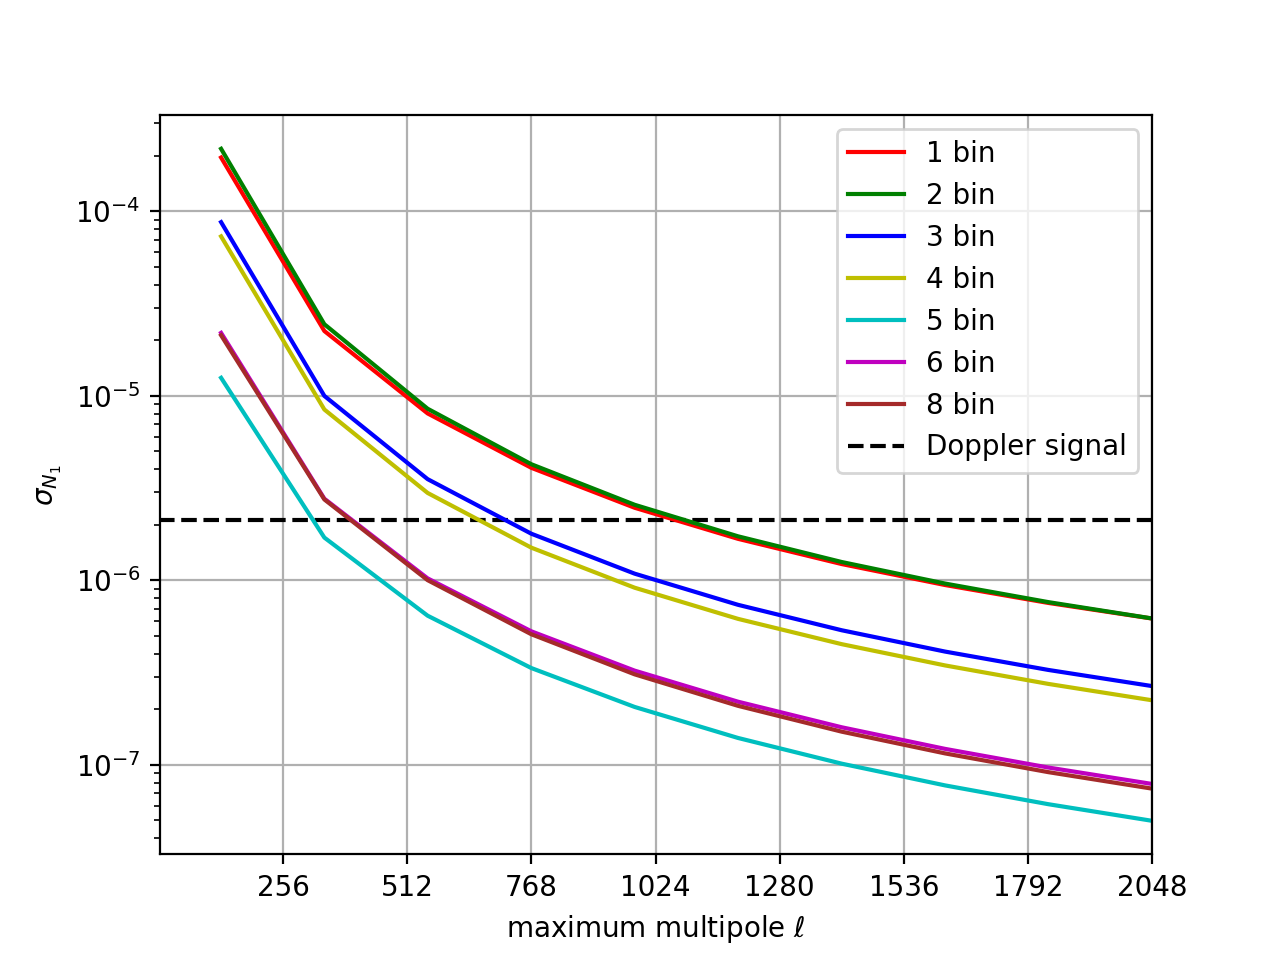

In [54]:
figure()
plot(fct1.ell_max,fct1.err,"r-",label="1 bin")
plot(fct2.ell_max,fct2.err,"g-",label="2 bin")
plot(fct3.ell_max,fct3.err,"b-",label="3 bin")
plot(fct4.ell_max,fct4.err,"y-",label="4 bin")
plot(fct5.ell_max,fct5.err,"c-",label="5 bin")
plot(fct6.ell_max,fct6.err,"m-",label="6 bin")
plot(fct8.ell_max,fct8.err,"-",c="brown",label="8 bin")
semilogy()
hlines(pi*(2.*beta/3.)**2.,0,max(fct1.ell_max),linestyle="dashed",label=r"Doppler signal")
semilogy() ; grid()
xlim(2,max(fct1.ell_max))
legend(loc=0)
xticks([256,512,768,1024,1280,1536,1792,2048],[256,512,768,1024,1280,1536,1792,2048])
xlabel("maximum multipole $\ell$")
ylabel(r"$\sigma_{N_1}$")

In [55]:
beta=1.23e-3
sky_area=42000.

fct1=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct1.init_camb(lmax=2048,limber_phi_lmin=300)
fct1.setup_obs_param(flux_cutoff=fct1.flux_cutoff_options[0],area_obs=sky_area)
fct1.setup_window_functions(normalize=False,nzbin=1,z_olap=-0.01,taper_width=0.05)
fct1.return_spectra()

fct2=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct2.init_camb(lmax=2048,limber_phi_lmin=300)
fct2.setup_obs_param(flux_cutoff=fct2.flux_cutoff_options[0],area_obs=sky_area)
fct2.setup_window_functions(normalize=False,nzbin=2,z_olap=-0.01,taper_width=0.05)
fct2.return_spectra()

fct3=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct3.init_camb(lmax=2048,limber_phi_lmin=300)
fct3.setup_obs_param(flux_cutoff=fct3.flux_cutoff_options[0],area_obs=sky_area)
fct3.setup_window_functions(normalize=False,nzbin=3,z_olap=-0.01,taper_width=0.05)
fct3.return_spectra()

fct4=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct4.init_camb(lmax=2048,limber_phi_lmin=300)
fct4.setup_obs_param(flux_cutoff=fct4.flux_cutoff_options[0],area_obs=sky_area)
fct4.setup_window_functions(normalize=False,nzbin=4,z_olap=-0.01,taper_width=0.05)
fct4.return_spectra()

fct5=tmd.ska_spectroscopic_doppler_forecast(bnu=3.)
fct5.init_camb(lmax=2048,limber_phi_lmin=300)
fct5.setup_obs_param(flux_cutoff=fct5.flux_cutoff_options[0],area_obs=sky_area)
fct5.setup_window_functions(normalize=False,nzbin=5,z_olap=-0.01,taper_width=0.05)
fct5.return_spectra()

fct6=tmd.ska_spectroscopic_doppler_forecast()
fct6.init_camb(lmax=2048,limber_phi_lmin=300)
fct6.setup_obs_param(flux_cutoff=fct6.flux_cutoff_options[0],area_obs=sky_area)
fct6.setup_window_functions(normalize=False,nzbin=6,z_olap=-0.01,taper_width=0.05)
fct6.return_spectra()

fct8=tmd.ska_spectroscopic_doppler_forecast()
fct8.init_camb(lmax=2048,limber_phi_lmin=300)
fct8.setup_obs_param(flux_cutoff=fct8.flux_cutoff_options[0],area_obs=sky_area)
fct8.setup_window_functions(normalize=False,nzbin=8,z_olap=-0.01,taper_width=0.05)
fct8.return_spectra()

fct1.calc_doppler_error()
fct2.calc_doppler_error()
fct3.calc_doppler_error()
fct4.calc_doppler_error()
fct5.calc_doppler_error()
fct6.calc_doppler_error()
fct8.calc_doppler_error()

<IPython.core.display.Javascript object>


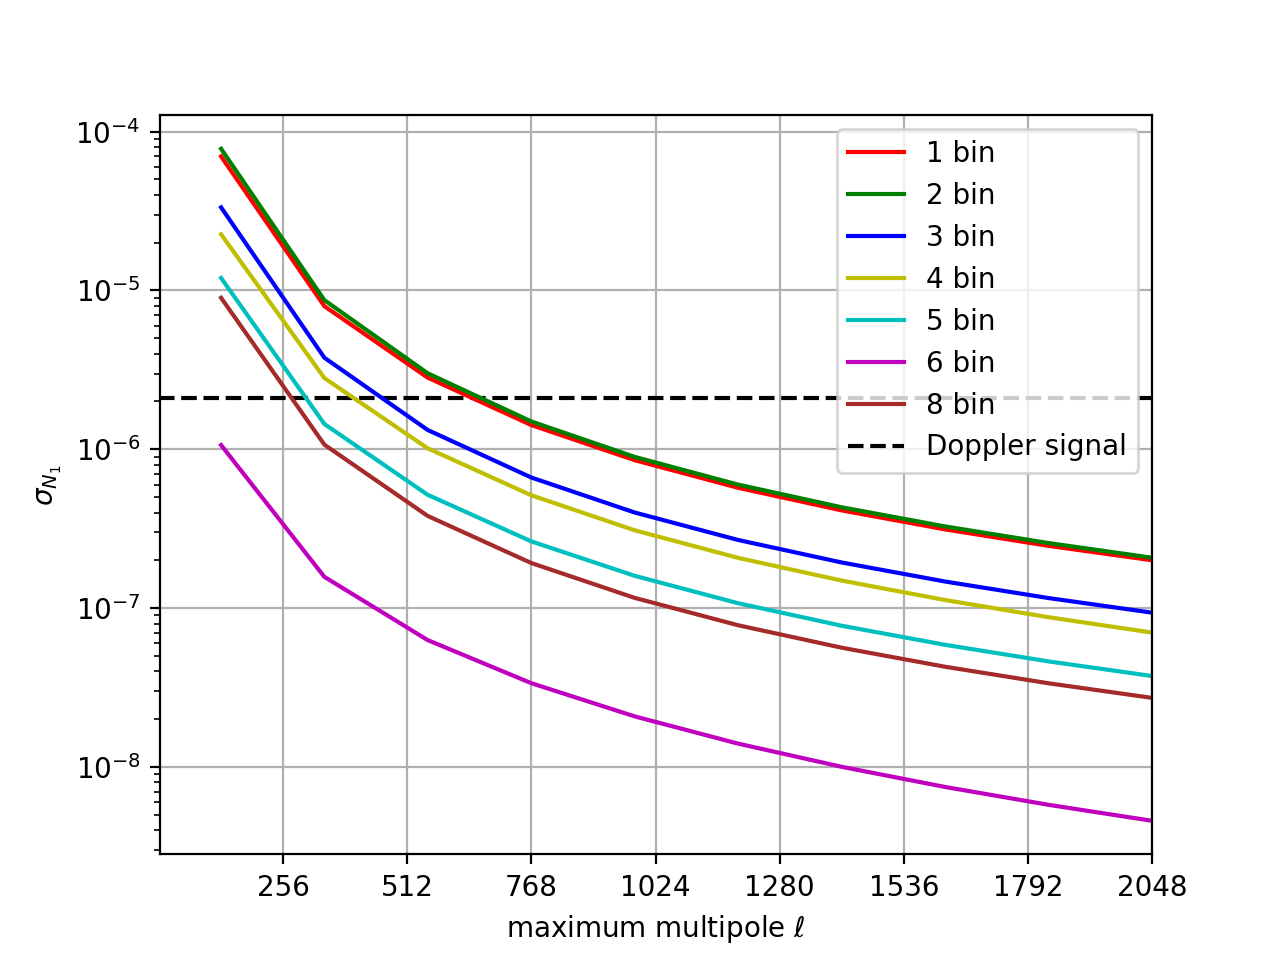

In [56]:
figure()
plot(fct1.ell_max,fct1.err,"r-",label="1 bin")
plot(fct2.ell_max,fct2.err,"g-",label="2 bin")
plot(fct3.ell_max,fct3.err,"b-",label="3 bin")
plot(fct4.ell_max,fct4.err,"y-",label="4 bin")
plot(fct5.ell_max,fct5.err,"c-",label="5 bin")
plot(fct6.ell_max,fct6.err,"m-",label="6 bin")
plot(fct8.ell_max,fct8.err,"-",c="brown",label="8 bin")
semilogy()
hlines(pi*(2.*beta/3.)**2.,0,max(fct1.ell_max),linestyle="dashed",label=r"Doppler signal")
semilogy() ; grid()
xlim(2,max(fct1.ell_max))
legend(loc=0)
xticks([256,512,768,1024,1280,1536,1792,2048],[256,512,768,1024,1280,1536,1792,2048])
xlabel("maximum multipole $\ell$")
ylabel(r"$\sigma_{N_1}$")